In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import lmfit as lm

#plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np

In [2]:
# import data from text file
import pandas as pds


damic_data = pds.read_csv("data/DAMIC_EXCESS_sigvE_good_update.txt", skiprows=1, \
                         names=['Energy', 'Sig'], \
                         delim_whitespace=False
                     )

print (damic_data.head(10))

E = np.asarray(damic_data["Energy"], dtype=np.float32)

print (E)

   Energy     Sig
0  0.0681  0.3324
1  0.0571  0.5792
2  0.0715  0.6575
3  0.0936  0.7235
4  0.0914  0.5451
5  0.1102  0.3667
6  0.1297  0.6479
7  0.1395  0.7603
8  0.1479  0.6992
9  0.1623  0.7187
[0.0681 0.0571 0.0715 0.0936 0.0914 0.1102 0.1297 0.1395 0.1479 0.1623
 0.1995 0.2178 0.2315 0.2583 0.3039 0.5218 0.6258 0.712  0.8869 0.8401]


In [3]:
import copy
#make histos (counts per day)

ebins = np.linspace(0,1,21)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(E,bins=ebins)

#newthing=copy.deepcopy(xcq)
#print(newthing.size)

#get the correct errors
error1 = [0.00,0.37,0.74,1.10,2.34,2.75,3.82,4.25,5.30,6.33,6.78,7.81,8.83,9.28]
error2 = [1.29,2.75,4.25,5.30,6.78,7.81,9.28,10.30,11.32,12.79,13.81,14.82,16.29,17.30]
ntot = n
print(np.sum(ntot))
ntot_plus = np.zeros(np.shape(ntot))
ntot_minus = np.zeros(np.shape(ntot))
for i,ncount in enumerate(ntot):
    if ncount<=13:
        ntot_plus[i] = error2[ncount]-ncount
        ntot_minus[i] = ncount-error1[ncount]
    else:
        ntot_plus[i] = np.sqrt(ncount)
        ntot_minus[i] = np.sqrt(ncount)

20


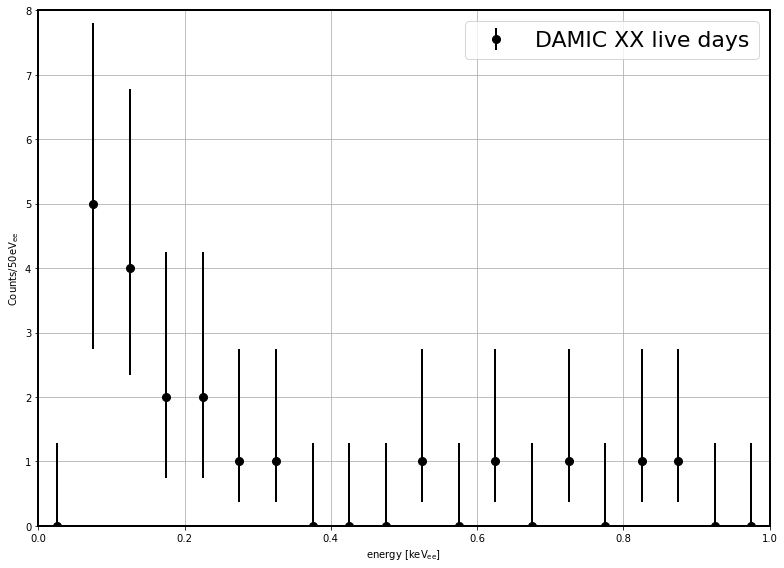

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(11.0,8.0),sharex=True)
ax1 = axes



#print(estring)


ax1.errorbar(xcq,n,yerr=[ntot_minus,ntot_plus], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='DAMIC XX live days', linewidth=2)



ymin = 0
ymax = 8

blue = '#118DFA'



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV$_{\mathrm{ee}}$]')
ax1.set_ylabel('Counts/50eV$_{\mathrm{ee}}$')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [5]:
print(ebins)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [6]:
print(xcq)

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975]


In [7]:
#First run Lindhard
import pickle as pkl
import R68_load as r68
import R68_efficiencies as eff
meas=r68.load_measured()
import R68_spec_tools as spec

Emax = 1000 #eVee
Ebins=np.linspace(0,Emax,210) #I changed E max from 2000 to 1000 to make the x axis of the two plots line up
Ebins_ctr=(Ebins[:-1]+Ebins[1:])/2
Efit_min=50#[eVee]
Efit_max=1000#[eVee]
spec_bounds=(np.digitize(Efit_min,Ebins)-1,np.digitize(Efit_max,Ebins)-1)

Ebins_ctr[slice(*spec_bounds)].shape

cthresh=Ebins_ctr>=50 #Only plot hists above threshold

c_stat,dc_stat=spec.doBkgSub(r68.load_measured(verbose=False), Ebins, Efit_min, Efit_max, doEffsyst=False, doBurstLeaksyst=False, output='counts')
c_syst,dc_syst=spec.doBkgSub(r68.load_measured(verbose=False), Ebins, Efit_min, Efit_max, doEffsyst=True, doBurstLeaksyst=False, output='counts')
c_syst2,dc_syst2=spec.doBkgSub(r68.load_measured(verbose=False), Ebins, Efit_min, Efit_max, doEffsyst=True, doBurstLeaksyst=True, output='counts')

r_stat,dr_stat=spec.doBkgSub(r68.load_measured(verbose=False), Ebins, Efit_min, Efit_max, doEffsyst=False, doBurstLeaksyst=False, output='reco-rate')
r_syst,dr_syst=spec.doBkgSub(r68.load_measured(verbose=False), Ebins, Efit_min, Efit_max, doEffsyst=True, doBurstLeaksyst=False, output='reco-rate')
r_syst2,dr_syst2=spec.doBkgSub(r68.load_measured(verbose=False), Ebins, Efit_min, Efit_max, doEffsyst=True, doBurstLeaksyst=True, output='reco-rate')
#r_syst2 is counts with systematic uncertainties added?

ModuleNotFoundError: No module named 'R68_load'

In [ ]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(11.0,8.0),sharex=True)
ax1 = axes



#print(estring)


#axs1.errorbar(Ebin_ctr[Ebin_ctr>50],RQss[1]['N_meas'][Ebin_ctr>50],(RQss[1]['dN_meas'].T[Ebin_ctr>50]).T,
#                ecolor='k', marker='o',markersize=8,color='k', linestyle='none',label='Measured',zorder=5,linewidth=3)


line_r_syst=ax1.errorbar(Ebins_ctr[cthresh]/1000,60*r_syst2[cthresh],yerr=(60*dr_syst2[::-1])[:,cthresh],\
                         drawstyle = 'steps-mid', linewidth=2, label='Stat + Syst')
line_r_stat=ax1.errorbar(Ebins_ctr[cthresh]/1000,60*r_stat[cthresh],yerr=60*dr_stat[::-1][:,cthresh],\
                         drawstyle = 'steps-mid', linewidth=2, label='Stat')

print(Ebins_ctr.size)

ymin = 0
ymax = 4

blue = '#118DFA'


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV$_{\mathrm{ee}}$]')
ax1.set_ylabel('Counts/min/bin')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})


for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

#print(np.sum(r_stat[4:]))

#for i in np.nditer(r_stat[4:]):
  #  print(i)

In [ ]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(11.0,8.0),sharex=True)
ax1 = axes



#print(estring)


ax1.errorbar(xcq,n,yerr=[ntot_minus,ntot_plus], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='DAMIC XX live days', linewidth=2)

line_r_syst=ax1.errorbar(Ebins_ctr[cthresh]/1000,2*60*r_syst2[cthresh],yerr=(1.5*60*dr_syst2[::-1])[:,cthresh], \
                         drawstyle = 'steps-mid', linewidth=2, label='R68 measured (Stat + Syst)')
line_r_stat=ax1.errorbar(Ebins_ctr[cthresh]/1000,2*60*r_stat[cthresh],yerr=1.5*60*dr_stat[::-1][:,cthresh], \
                      drawstyle = 'steps-mid', linewidth=2, label='R68 measured (Stat)')



ymin = 0
ymax = 8

blue = '#118DFA'



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV$_{\mathrm{ee}}$]')
ax1.set_ylabel('Counts/50eV$_{\mathrm{ee}}$')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [ ]:
damic_model = pds.read_csv("data/DAMIC_excess_model.txt", skiprows=1, \
                         names=['Energy', 'counts'], \
                         delim_whitespace=False
                     )

print (damic_model.head(10))

Emod = np.asarray(damic_model["Energy"], dtype=np.float32)
cmod = np.asarray(damic_model["counts"], dtype=np.float32)

In [ ]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(11.0,8.0),sharex=True)
ax1 = axes



#print(estring)

dam_fit=ax1.plot(Emod,cmod,color='r',label='DAMIC fit', linewidth=2)

ax1.errorbar(xcq,n,yerr=[ntot_minus,ntot_plus], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='DAMIC XX live days', linewidth=2)

line_r_syst=ax1.errorbar(Ebins_ctr[cthresh]/1000,2*60*r_syst2[cthresh],yerr=(1.5*60*dr_syst2[::-1])[:,cthresh], \
                         drawstyle = 'steps-mid', linewidth=2, label='R68 measured (Stat + Syst)')
line_r_stat=ax1.errorbar(Ebins_ctr[cthresh]/1000,2*60*r_stat[cthresh],yerr=1.5*60*dr_stat[::-1][:,cthresh], \
                         drawstyle = 'steps-mid', linewidth=2, label='R68 measured (Stat)')




ymin = 0
ymax = 8

blue = '#118DFA'



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV$_{\mathrm{ee}}$]')
ax1.set_ylabel('Counts/50eV$_{\mathrm{ee}}$')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [ ]:
#Plot of R68 counts, multiply rate counts/min/bin by 2.5 live days
fig,axes = plt.subplots(1,1,figsize=(11.0,8.0),sharex=True)
ax1 = axes



#counts_r_syst2 = 3600 * r_syst2
counts_r_stat = 3600*60*r_stat
#print(counts_r_stat)

#print(np.sum(counts_r_stat[4:]))

# Plot the histograms with counts multiplied by 3600
#line_r_syst_count = ax1.plot(Ebins_ctr[cthresh] / 1000, counts_r_syst2[cthresh], drawstyle='steps-mid', linewidth=2, label='Stat + Syst')
line_r_stat_count = ax1.errorbar(Ebins_ctr[cthresh] / 1000, 3600*60*r_stat[cthresh],yerr=3600*60*dr_stat[::-1][:,cthresh], drawstyle='steps-mid', linewidth=2, label='R68 2.5 Live days ')


ymin = 0
ymax = 10000

#damic has 20 bins r68 has 200




        #elif r1[1] != 0:
            #print("i:",i," j:",j, "  big ebins val:", x, "lil ebins val:", y)
        #else:
            #print("uh oh")
            

    
#print(imstupidlesscounts)AAAAAAAAAAAAAAAAAAAa

#reducedR68histoBins=np.array(imstupidlesscounts)
#print(reducedR68histoBins.size)
#for i,x in enumerate(Ebins_ctr1):
  #  for j,y in enumerate(newthing):
#        r1=divmod(x,y)
 #       if x==y:
  #          imstupidlesscounts.append(counts_r_stat[i])
   #         print("i:",i," j:",j, "  big ebins val:", x, "lil ebins val:", y)
  #          continue
        #elif r1[1] != 0:
            #print("i:",i," j:",j, "  big ebins val:", x, "lil ebins val:", y)
        #else:
            #print("uh oh")
            
scale_factor = np.sum(n)/np.sum(counts_r_stat[9:])

blue = '#118DFA'



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV$_{\mathrm{ee}}$]')
ax1.set_ylabel('Counts/bin')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})


for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()






In [ ]:
##############

#Rebinning
fig,axes = plt.subplots(1,1,figsize=(11.0,8.0),sharex=True)
ax1 = axes

Emax1 = 1000 #eVee
Ebins1=np.linspace(0,Emax,21) #I changed E max from 2000 to 1000 to make the x axis of the two plots line up
Ebins_ctr1=(Ebins1[:-1]+Ebins1[1:])/2
Efit_min1=50#[eVee]
Efit_max1=1000#[eVee]
spec_bounds1=(np.digitize(Efit_min1,Ebins1)-1,np.digitize(Efit_max1,Ebins1)-1)

Ebins_ctr1[slice(*spec_bounds)].shape

cthresh1=Ebins_ctr1>=50 #Only plot hists above threshold

c_stat1,dc_stat1=spec.doBkgSub(r68.load_measured(verbose=False), Ebins1, Efit_min1, Efit_max1, doEffsyst=False, doBurstLeaksyst=False, output='counts')
c_syst,dc_syst=spec.doBkgSub(r68.load_measured(verbose=False), Ebins1, Efit_min1, Efit_max1, doEffsyst=True, doBurstLeaksyst=False, output='counts')
c_syst2,dc_syst2=spec.doBkgSub(r68.load_measured(verbose=False), Ebins1, Efit_min1, Efit_max1, doEffsyst=True, doBurstLeaksyst=True, output='counts')

r_stat1,dr_stat1=spec.doBkgSub(r68.load_measured(verbose=False), Ebins1, Efit_min1, Efit_max1, doEffsyst=False, doBurstLeaksyst=False, output='reco-rate')
r_syst1,dr_syst1=spec.doBkgSub(r68.load_measured(verbose=False), Ebins1, Efit_min1, Efit_max1, doEffsyst=True, doBurstLeaksyst=False, output='reco-rate')
r_syst2_1,dr_syst2_1=spec.doBkgSub(r68.load_measured(verbose=False), Ebins1, Efit_min1, Efit_max1, doEffsyst=True, doBurstLeaksyst=True, output='reco-rate')
#r_syst2 is counts with systematic uncertainties added?

line_r_stat_count1 = ax1.errorbar(Ebins_ctr1[cthresh1] / 1000, 3600*60*r_stat1[cthresh1], drawstyle='steps-mid', linewidth=2, label='R68 2.5 Live days ')

ymin = 0
ymax = 40000

blue = '#118DFA'



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV$_{\mathrm{ee}}$]')
ax1.set_ylabel('Counts/bin')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

plt.show()

In [ ]:
#Plot of R68 counts, multiply rate counts/min/bin by 2.5 live days
fig,axes = plt.subplots(1,1,figsize=(11.0,7.0),sharex=True)
ax1 = axes




#counts_r_syst2 = 3600 * r_syst2
#counts_r_stat = 3600*60*r_stat

#print(np.sum(scale_factor*counts_r_stat[10:]))



    


#r_syst2_1,dr_syst2_1=spec.doBkgSub(r68.load_measured(verbose=False), Ebins1, Efit_min1, Efit_max1, doEffsyst=True, doBurstLeaksyst=True, output='reco-rate')

damic_histo = ax1.errorbar(xcq,n,yerr=[ntot_minus,ntot_plus], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='DAMIC XX live days', linewidth=2)

line_r_syst_adj=ax1.errorbar(Ebins_ctr1[cthresh1]/1000, scale_factor*3600*60*r_syst2_1[cthresh1],yerr=(scale_factor*3600*60*dr_syst2_1[::-1])[:,cthresh1], \
                         color='r', ecolor='r', marker='o', drawstyle = 'steps-mid', linewidth=2, label='R68 measured (Stat + Syst)')

line_r_stat_adj=ax1.errorbar(Ebins_ctr1[cthresh1] / 1000, scale_factor*3600*60*r_stat1[cthresh1],\
            ecolor='c', marker='o', yerr=scale_factor*3600*60*dr_stat1[::-1][:,cthresh1], drawstyle='steps-mid', linewidth=2, label='R68 2.5 Live days (stat)')





ymin = 0
ymax = 10


blue = '#118DFA'

print(n.sum())


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV$_{\mathrm{ee}}$]')
ax1.set_ylabel('Counts/bin')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})


for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
counts_r_stat2=scale_factor*3600*60*r_stat1[cthresh1]
nnew = np.delete(n, 0)

#null: histos are independent
print(n)
print(counts_r_stat2)

n_bins = len(nnew)

contingency_table = np.column_stack((nnew, counts_r_stat2))
print(contingency_table)
#scipy.stats.contingency.expected_freq
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

#this might b kinda a bad estimate because low counts...